In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
df = pd.read_csv(url, names=columns)

In [5]:
#aqui eu dou print do data frame para visualizar od dados

print(df.head())
print(df.describe())

   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0
          variance     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000


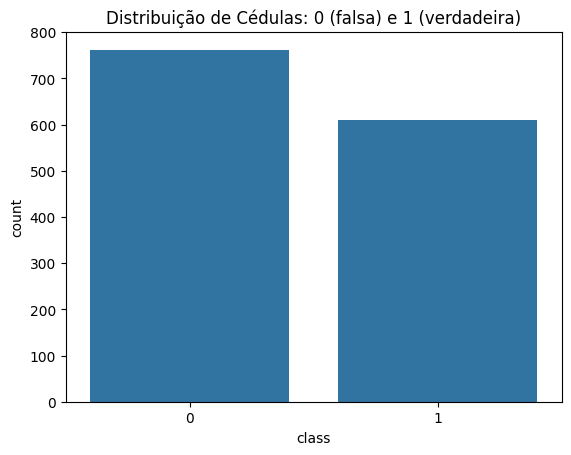

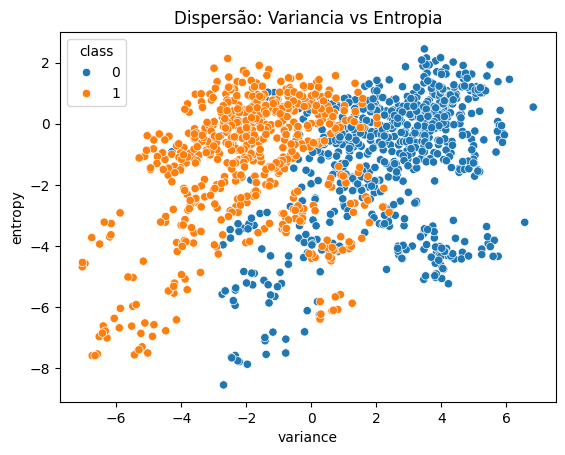

In [16]:
sns.countplot(x='class', data=df)
plt.title('Distribuição de Cédulas: 0 (falsa) e 1 (verdadeira)')
plt.show()
sns.scatterplot(x='variance', y='entropy', hue='class', data=df)
plt.title('Dispersão: Variancia vs Entropia')
plt.show()

In [8]:
print(df.isnull().sum())

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64


In [9]:
X = df.drop('class', axis=1)
y = df['class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [11]:
#estou pegadno os modelos do scikit-learn como foi pedido

model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
acc1 = accuracy_score(y_test, y_pred1)

model2 = RandomForestClassifier()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
acc2 = accuracy_score(y_test, y_pred2)


In [15]:
#prints para ver qual modelo foi mais preciso
print(f"Acurácia - Regressão Logística: {acc1:.2f}")
print(f"Acurácia - Random Forest: {acc2:.2f}")

melhor_modelo = "Random Forest" if acc2 > acc1 else "Regressão Logística"
print(f"➡ Melhor modelo: {melhor_modelo}")

print("\nRelatório do melhor modelo:")
print(classification_report(y_test, y_pred2 if acc2 > acc1 else y_pred1))

Acurácia - Regressão Logística: 0.98
Acurácia - Random Forest: 1.00
➡ Melhor modelo: Random Forest

Relatório do melhor modelo:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      0.99      1.00       183

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



### Justificativa do database que escolhi


# Escolhi a banknote por ser bastante usada em projetos desse tipo, ela permite construir modelos de aprendizagem de máquina. Em si o banknote foi criado para identificar notas bancárias e definir se elas são verdadeiras ou falas com base em apenas 4 variáveis que são estraídas de imagens digitalizadas.

#Como são só 4 variáveis fica até fácil de trabalhar com esse database.
#Fiz um pré processamento bem básico, pois nesse dataframe não tinha nenhum dado faltante. Apenas separei o data frame em 2 tirando a coluna class que é o valor que estou tentando prever com o código. Nesse caso 1 significa que as cédulas são verdadeiras e 0 que são falsas


#treinei dois modelos que peguei do scikit-learn , alimentei com os dados da coluna class. O print na parte final mostra o modelo que mais conseguiu prever de forma acertiva (melhor desempenho no teste).
